In [106]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "C:/Users/16306/Downloads/Mouse_metadata.csv"
study_results_path = "C:/Users/16306/Downloads/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how='inner', on="Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [5]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [8]:
# Checking the number of mice.
ct_mice = combined_df["Mouse ID"].count()
ct_mice

1893

In [11]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_row_df = combined_df[combined_df.duplicated(['Mouse ID','Timepoint'])]
duplicate_row_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [12]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_id_dups = combined_df[combined_df.duplicated(['Mouse ID'])]
mouse_id_dups


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined_df = combined_df.drop_duplicates("Mouse ID")
clean_combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [15]:
# Checking the number of mice in the clean DataFrame.
ct_mice_clean = clean_combined_df["Mouse ID"].count()
ct_mice_clean

249

## Summary Statistics

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
 
# Assemble the resulting series into a single summary dataframe.
summary_combined_df = pd.DataFrame({"mean": mean, "median": median, "var": var, "std": std, "sem": sem})
summary_combined_df


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary2_group = combined_df.groupby('Drug Regimen')
summary2 = summary2_group.agg(['mean','median','var','std','sem'])['Tumor Volume (mm3)']
summary2


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

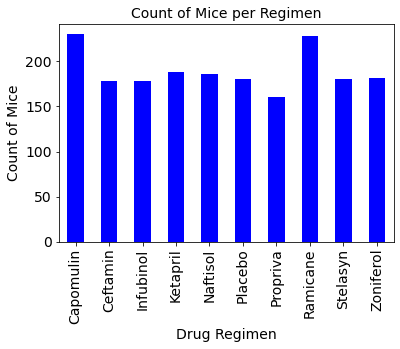

In [42]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

ct_mice_per_reg = combined_df.groupby(["Drug Regimen"]).count()["Mouse ID"] 


ct_mice_plot = ct_mice_per_reg.plot(kind="bar", color='blue',fontsize = 14)
plt.title("Count of Mice per Regimen",fontsize = 14)
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Count of Mice",fontsize = 14)

plt.show()

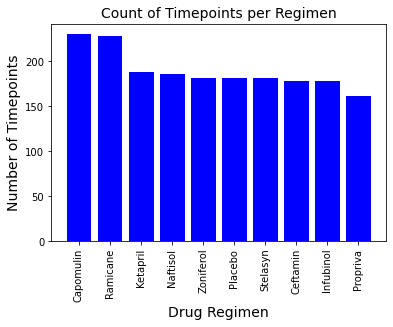

In [56]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x = combined_df["Drug Regimen"].value_counts().index
y = combined_df["Drug Regimen"].value_counts()
plt.bar(x, y, color='blue')
plt.xticks(rotation = 90)
plt.title("Count of Timepoints per Regimen",fontsize = 14)
plt.ylabel("Number of Timepoints",fontsize = 14)
plt.xlabel("Drug Regimen",fontsize = 14)

plt.show()


In [61]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df = pd.DataFrame(mouse_metadata.groupby(["Sex"]).count()).reset_index()
gender_df_clean = gender_df [['Sex','Mouse ID']].copy()
gender_df_clean.head()

,Sex,Mouse ID
0,Female,124
1,Male,125


<Figure size 432x288 with 0 Axes>

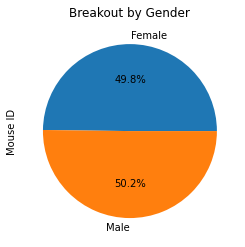

In [87]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure()
gender_df_clean.plot(kind="pie",y = "Mouse ID", autopct='%.1f%%', legend = False, labels=gender_df_clean["Sex"])

plt.title("Breakout by Gender")
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume')

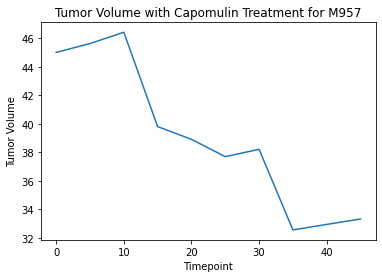

In [93]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

x = combined_df.loc[combined_df["Mouse ID"] == "m957"]
x = x["Timepoint"]
y = combined_df.loc[combined_df["Mouse ID"] == "m957"]
y = y["Tumor Volume (mm3)"]

plt.plot(x, y)
plt.title("Tumor Volume with Capomulin Treatment for M957")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")

Text(0, 0.5, 'Tumor Volume (mm3)')

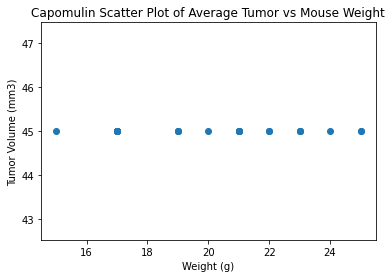

In [105]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_only_df = clean_combined_df.loc[clean_combined_df["Drug Regimen"] == "Capomulin"]
capomulin_only_df

plt.scatter(capomulin_only_df["Weight (g)"], capomulin_only_df["Tumor Volume (mm3)"])
plt.title("Capomulin Scatter Plot of Average Tumor vs Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")